# 2.2. MadaLine

## 2.2.B. Define and Plot Data

In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1NRwDhqrhXF8tRy1HKe9QofJZjPBnHV1r

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1NRwDhqrhXF8tRy1HKe9QofJZjPBnHV1r
To: /content/MadaLine.csv
100% 8.69k/8.69k [00:00<00:00, 10.6MB/s]


In [ ]:
df = pd.read_csv('/content/MadaLine.csv',names=['x', 'y','label'],header=None)
df

,x,y,label
0,-0.642823,0.720606,0.0
1,-0.218126,0.677263,0.0
2,-0.582930,-0.347496,0.0
3,0.285127,0.091750,0.0
4,-0.335577,-0.313893,0.0
...,...,...,...
195,0.744066,-1.206548,1.0
196,-0.457547,1.286227,1.0
197,-1.020000,-0.783926,1.0
198,1.363429,-0.800250,1.0


In [ ]:
df = df.sample(frac = 1)
df

,x,y,label
14,-0.469356,-0.474269,0.0
188,-0.677537,1.091894,1.0
157,1.540464,0.062636,1.0
179,0.369713,-1.186841,1.0
62,-0.682580,-0.134757,0.0
...,...,...,...
6,-0.639411,-0.171208,0.0
192,0.568141,1.437551,1.0
99,-0.744701,-0.432392,0.0
96,-0.171735,-0.881529,0.0


In [ ]:
data = df[['x','y']]
inputs = data.to_numpy()
inputs.shape[0]

200

In [ ]:
# Convert to Bipolar
label = df[['label']]
target = label.to_numpy()
target[np.isclose(target, 0)] = -1

In [ ]:
df0 = df.loc[df['label']  == 0 ]
df1 = df.loc[df['label']  == 1]

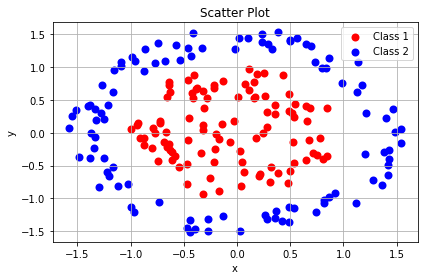

In [ ]:
# scatter plot
plt.scatter(df0['x'], df0['y'], c="red", linewidths=2)
plt.scatter(df1['x'], df1['y'], c="blue", linewidths=2)

# add axis labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Class 1", "Class 2"])

# add grid
plt.grid(True)

# add title
plt.title("Scatter Plot")

# adjust subplot spacing
plt.tight_layout()

# save the figure as PDF
plt.savefig("scatter_plot.pdf")

# show the plot
plt.show()

In [ ]:
df = df.sample(frac=1, random_state=5).reset_index()
df

,index,x,y,label
0,92,0.155789,0.768451,0.0
1,26,-0.032163,0.179866,0.0
2,115,-1.093754,1.079181,1.0
3,57,0.546561,0.438163,0.0
4,187,0.326746,1.271150,1.0
...,...,...,...,...
195,118,0.796210,0.990588,1.0
196,65,0.513081,0.298807,0.0
197,88,0.484549,0.590856,0.0
198,145,0.814315,-1.067399,1.0


## 2.2.C. MRI Implementation

In [ ]:
def find_decision_boundary(start_x, end_x, weights, biases):
    """
    Calculates the decision boundary given the start and end x values, weights, and biases.
    
    Args:
    start_x (float): The start x value.
    end_x (float): The end x value.
    weights (numpy.ndarray): An array of weights.
    biases (float): The bias value.
    
    Returns:
    inputs (numpy.ndarray): An array of x values.
    output (numpy.ndarray): An array of y values representing the decision boundary.
    """
    
    # Create an array of x values
    inputs = np.linspace(start_x, end_x)
    
    # Calculate the corresponding y values using the given weights and biases
    output = -(weights[0] * inputs + biases)
    output = output / weights[1]
    
    return inputs, output


def initialize_weights(sm, num_neurons_layer1, num_neurons_layer2):
    # Set a random seed for reproducibility
    np.random.seed(10)
    
    # Generate random weights and biases for the first layer
    weights = np.random.rand(num_neurons_layer1, num_neurons_layer2) * sm
    biases = np.zeros((num_neurons_layer1, 1))
    
    # Initialize weights and biases for the second layer
    # The weights for the second layer are initialized to 1
    weights_layer2 = np.array([[1]*num_neurons_layer1])
    biases_layer2 = num_neurons_layer1 - 1
    
    # Return all the initialized weights and biases
    return weights, biases, weights_layer2, biases_layer2

def apply_activation_function(net):
    # np.where(condition, x, y) returns an array with the same shape as condition, 
    # where the elements are taken from x where condition is True, 
    # and from y elsewhere. In this case, the condition is whether each element of 
    # the input net is greater than or equal to 0. If it is, the corresponding element 
    # in the output h is set to 1; otherwise, it is set to -1.
    h = np.where(net >= 0, 1, -1)
    return h

def forward_propagation(weights, inputs, biases, should_reshape):
    # Check if inputs should be reshaped
    if should_reshape:
        inputs = inputs.reshape((2, 1))
    # Calculate the net input
    net_input = np.dot(weights, inputs) + biases
    # Apply activation function to net input to obtain outputs
    outputs = apply_activation_function(net_input)
    # Return both net input and outputs
    return net_input, outputs

def update_weights(weights, biases, inputs, target, net_input, output, learning_rate, num_neurons_layer1):
    # Reshape inputs and net_input
    inputs = inputs.reshape((1, 2))
    net_input = net_input.reshape((num_neurons_layer1, 1))

    # If target is equal to output, no weight or bias update is necessary
    if target == output:
        return weights, biases
    # If target is 1 and output is -1, update weights and biases for the neuron with the highest net input
    elif target == 1 and target != output:    #output=-1 but target=1
        argmax_neuron = np.argmax(net_input)
        diff_bias = learning_rate * (1 - net_input[argmax_neuron])
        diff_weight = learning_rate * np.dot((1 - net_input[argmax_neuron]), inputs)
        biases[argmax_neuron] = biases[argmax_neuron] + diff_bias
        weights[argmax_neuron] = weights[argmax_neuron] + diff_weight
    # If target is -1 and output is 1, update weights and biases for all neurons with positive net input
    elif target == -1 and target != output:   # output=1 but target=-1
        positive_indices = np.argwhere(net_input > 0)
        diff_bias = learning_rate * (-1 - net_input)
        diff_weight = learning_rate * np.dot((-1 - net_input), inputs)
        new_biases = biases + diff_bias
        new_weights = weights + diff_weight
        for i in positive_indices[:, 0]:
            weights[i] = new_weights[i]
            biases[i] = new_biases[i]
    # Return updated weights and biases
    return weights, biases

# Define a function named calculate_error
def calculate_error(target, output):
    # Calculate the error using the mean squared error formula
    error = 0.5 * np.power((target - output), 2)
    # Return the calculated error
    return error

def predict(inputs, target, weights, biases, num_neurons_layer1):
    # initialize an empty list to store predicted outputs
    predicted_output = []
    
    # initialize biases_layer2 as a numpy array of zeros
    biases_layer2 = np.zeros((num_neurons_layer1, 1))
    
    # initialize weights_layer2 as a numpy array of shape (1, num_neurons_layer1) with all elements as 1
    weights_layer2 = np.array([[1]*num_neurons_layer1])
    
    # update biases_layer2 to have a value of num_neurons_layer1 - 1
    biases_layer2 = num_neurons_layer1 - 1
    
    # loop through each input and calculate the predicted output using forward propagation
    for i in range(inputs.shape[0]):
        # call the forward_propagation function with inputs, weights, biases, and should_reshape=True
        net_input, outputs = forward_propagation(weights, inputs[i], biases, should_reshape=True)
        
        # call the forward_propagation function with weights_layer2, outputs, biases_layer2, and should_reshape=False
        net_input2, output = forward_propagation(weights_layer2, outputs, biases_layer2, should_reshape=False)
        
        # append the predicted output to the predicted_output list
        predicted_output.append(output[0])
    
    # return the list of predicted outputs
    return predicted_output

In [1]:
def MRI(df0, df1, inputs, target, num_neurons_layer1=3, num_neurons_layer2=2, learning_rate=0.0001, max_iter=200, samples=None, plot=True):
    # If samples is not provided, set it to the number of rows in the input data.
    if samples is None:
        samples = inputs.shape[0]
    # Print the number of samples.
    print('sample:', samples)
    # Initialize variables
    sm = 0.001
    error_list = []
    errors = []
    mean_error = 10**3
    weights, biases, weights_layer2, biases_layer2 = initialize_weights(sm, num_neurons_layer1, num_neurons_layer2)  # Step 0
    # Iterate through the training process
    for i in range(max_iter):
        # Perform forward propagation
        net_input, outputs = forward_propagation(weights, inputs[i % samples], biases, should_reshape=True)  # Step 4 and 5
        net_input2, output = forward_propagation(weights_layer2, outputs, biases_layer2, should_reshape=False)  # Step 6
        # Calculate the error of the output
        error = calculate_error(target[i % samples], output)
        errors.append(error)
        # If an epoch has ended, calculate the mean error of the epoch and append it to the error list
        if i % samples == 0 and i != 0:
            mean_error = np.mean(errors)
            error_list.append(mean_error)
            errors = []
            # Print the epoch number and the mean error of the epoch
            print('Epoch %d / %d' % (len(error_list), int(max_iter / samples)))
            print('loss:', mean_error)
            for j in range(len(weights)):
                # Print the weights and biases for each layer
                print('W%d:'%(j+1),weights[j])
                print('b%d:'%(j+1),biases[j])
        # If the mean error is 0 or the difference between the mean error of the last two epochs is 0, an early stop occurred
        if mean_error == 0 or (i > 50 and len(error_list) >= 2 and error_list[-1] - error_list[-2] == 0):
            print('An early stop occurred!')
            # If plot is True, plot the error, decision boundary, confusion matrix, and classification report
            if plot:
                plt.plot(error_list)
                plt.xlabel('Epochs')
                plt.ylabel('Mean Squared Error')
                plt.title('Error Plot')
                plt.grid(True)
                plt.savefig('error_plot.pdf')
                plt.show()
                df0 = df0
                df1 = df1
                plt.scatter(df0['x'], df0['y'], c ="red", linewidths = 0.1)
                plt.scatter(df1['x'], df1['y'], c ="blue", linewidths = .1)
                # Plot the decision boundary
                for i in range(num_neurons_layer1):
                    px1, px2 = find_decision_boundary(-2, 2, weights[i], biases[i])
                    plt.plot(px1, px2)

                plt.xlabel("x")
                plt.ylabel("y")
                plt.legend(["Class 1" , "Class 2"])
                plt.xlim([-2, 2])
                plt.ylim([-2, 2])
                plt.savefig('error_plot1.pdf')
                plt.show()
                # Generate predictions
                predicted_output = predict(inputs, target, weights, biases, num_neurons_layer1)
                # Create confusion matrix
                cm = confusion_matrix(target, predicted_output)
                # Plot heatmap of confusion matrix
                plt.figure(figsize=(6, 4))
                sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
                plt.xlabel("Predicted labels")
                plt.ylabel("True labels")
                plt.title("Confusion Matrix")
                plt.tight_layout()
                # Save plot as PDF
                plt.savefig("confusion_matrix.pdf")
                plt.show()
                predicted_output = predict(inputs, target,weights,biases,num_neurons_layer1)
                print(classification_report(target, predicted_output))    
            return weights, biases, error_list
        weights, b = update_weights(weights, biases, inputs[i % samples], target[i % samples], net_input, output, learning_rate, num_neurons_layer1)  # Step 7
    
    if plot:
        plt.plot(error_list)
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('Error Plot')
        plt.grid(True)
        plt.savefig('error_plot.pdf')
        plt.show()
        df0 = df0
        df1 = df1
        plt.scatter(df0['x'], df0['y'], c ="red", linewidths = 0.1)
        plt.scatter(df1['x'], df1['y'], c ="blue", linewidths = .1)

        for i in range(num_neurons_layer1):
            px1, px2 = find_decision_boundary(-2, 2, weights[i], biases[i])
            plt.plot(px1, px2)

        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend(["Class 1" , "Class 2"])
        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        plt.savefig('error_plot1.pdf')
        plt.show()
        # Generate predictions
        predicted_output = predict(inputs, target, weights, biases, num_neurons_layer1)
        # Create confusion matrix
        cm = confusion_matrix(target, predicted_output)
        # Plot heatmap of confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title("Confusion Matrix")
        plt.tight_layout()
        # Save plot as PDF
        plt.savefig("confusion_matrix.pdf")
        plt.show()
        predicted_output = predict(inputs, target,weights,biases,num_neurons_layer1)
        print(classification_report(target, predicted_output))  

    return weights, biases, error_list

In [ ]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def find_decision_boundary(start_x, end_x, weights, biases):
    inputs = np.linspace(start_x, end_x)
    output = -(weights[0] * inputs + biases)
    output = output / weights[1]
    return inputs, output

def initialize_weights(sm, num_neurons_layer1, num_neurons_layer2):
    np.random.seed(10)
    weights = np.random.rand(num_neurons_layer1, num_neurons_layer2) * sm
    biases = np.zeros((num_neurons_layer1, 1))
    weights_layer2 = np.array([[1]*num_neurons_layer1])
    biases_layer2 = num_neurons_layer1 - 1
    return weights, biases, weights_layer2, biases_layer2

def apply_activation_function(net):
    h = np.where(net >= 0, 1, -1)
    return h

def forward_propagation(weights, inputs, biases, should_reshape):
    if should_reshape:
        inputs = inputs.reshape((2, 1))
    net_input = np.dot(weights, inputs) + biases
    outputs = apply_activation_function(net_input)
    return net_input, outputs

def update_weights(weights, biases, inputs, target, net_input, output, learning_rate, num_neurons_layer1):
    inputs = inputs.reshape((1, 2))
    net_input = net_input.reshape((num_neurons_layer1, 1))
    if target == output:
        return weights, biases
    elif target == 1 and target != output:    #output=-1 but target=1
        argmax_neuron = np.argmax(net_input)
        diff_bias = learning_rate * (1 - net_input[argmax_neuron])
        diff_weight = learning_rate * np.dot((1 - net_input[argmax_neuron]), inputs)
        biases[argmax_neuron] = biases[argmax_neuron] + diff_bias
        weights[argmax_neuron] = weights[argmax_neuron] + diff_weight
    elif target == -1 and target != output:   # output=1 but target=-1
        positive_indices = np.argwhere(net_input > 0)
        diff_bias = learning_rate * (-1 - net_input)
        diff_weight = learning_rate * np.dot((-1 - net_input), inputs)
        new_biases = biases + diff_bias
        new_weights = weights + diff_weight
        for i in positive_indices[:, 0]:
            weights[i] = new_weights[i]
            biases[i] = new_biases[i]
    return weights, biases

def calculate_error(target, output):
    error = 0.5 * np.power((target - output), 2)
    return error

def predict(inputs, target, weights, biases, num_neurons_layer1):
    predicted_output = []
    biases_layer2 = np.zeros((num_neurons_layer1, 1))
    weights_layer2 = np.array([[1]*num_neurons_layer1])
    biases_layer2 = num_neurons_layer1 - 1
    for i in range(inputs.shape[0]):
        net_input, outputs = forward_propagation(weights, inputs[i], biases, should_reshape=True)
        net_input2, output = forward_propagation(weights_layer2, outputs, biases_layer2, should_reshape=False)
        predicted_output.append(output[0])
    return predicted_output
    

def MRI(df0, df1, inputs, target, num_neurons_layer1=3, num_neurons_layer2=2, learning_rate=0.0001, max_iter=200, samples=None, plot=True):
    if samples is None:
        samples = inputs.shape[0]
    print('sample:', samples)
    sm = 0.001
    error_list = []
    errors = []
    mean_error = 10**3
    weights, biases, weights_layer2, biases_layer2 = initialize_weights(sm, num_neurons_layer1, num_neurons_layer2)  # Step 0
    for i in range(max_iter):
        net_input, outputs = forward_propagation(weights, inputs[i % samples], biases, should_reshape=True)  # Step 4 and 5
        net_input2, output = forward_propagation(weights_layer2, outputs, biases_layer2, should_reshape=False)  # Step 6
        error = calculate_error(target[i % samples], output)
        errors.append(error)
        if i % samples == 0 and i != 0:
            mean_error = np.mean(errors)
            error_list.append(mean_error)
            errors = []
            print('Epoch %d / %d' % (len(error_list), int(max_iter / samples)))
            print('loss:', mean_error)
            for j in range(len(weights)):
                print('W%d:'%(j+1),weights[j])
                print('b%d:'%(j+1),biases[j])
        if mean_error == 0 or (i > 50 and len(error_list) >= 2 and error_list[-1] - error_list[-2] == 0):
            print('An early stop occurred!')
            if plot:
                plt.plot(error_list)
                plt.xlabel('Epochs')
                plt.ylabel('Mean Squared Error')
                plt.title('Error Plot')
                plt.grid(True)
                plt.savefig('error_plot.pdf')
                plt.show()
                df0 = df0
                df1 = df1
                plt.scatter(df0['x'], df0['y'], c ="red", linewidths = 0.1)
                plt.scatter(df1['x'], df1['y'], c ="blue", linewidths = .1)

                for i in range(num_neurons_layer1):
                    px1, px2 = find_decision_boundary(-2, 2, weights[i], biases[i])
                    plt.plot(px1, px2)

                plt.xlabel("x")
                plt.ylabel("y")
                plt.legend(["Class 1" , "Class 2"])
                plt.xlim([-2, 2])
                plt.ylim([-2, 2])
                plt.savefig('error_plot1.pdf')
                plt.show()
                # Generate predictions
                predicted_output = predict(inputs, target, weights, biases, num_neurons_layer1)
                # Create confusion matrix
                cm = confusion_matrix(target, predicted_output)
                # Plot heatmap of confusion matrix
                plt.figure(figsize=(6, 4))
                sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
                plt.xlabel("Predicted labels")
                plt.ylabel("True labels")
                plt.title("Confusion Matrix")
                plt.tight_layout()
                # Save plot as PDF
                plt.savefig("confusion_matrix.pdf")
                plt.show()
                predicted_output = predict(inputs, target,weights,biases,num_neurons_layer1)
                print(classification_report(target, predicted_output))    
            return weights, biases, error_list
        weights, b = update_weights(weights, biases, inputs[i % samples], target[i % samples], net_input, output, learning_rate, num_neurons_layer1)  # Step 7
    
    if plot:
        plt.plot(error_list)
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('Error Plot')
        plt.grid(True)
        plt.savefig('error_plot.pdf')
        plt.show()
        df0 = df0
        df1 = df1
        plt.scatter(df0['x'], df0['y'], c ="red", linewidths = 0.1)
        plt.scatter(df1['x'], df1['y'], c ="blue", linewidths = .1)

        for i in range(num_neurons_layer1):
            px1, px2 = find_decision_boundary(-2, 2, weights[i], biases[i])
            plt.plot(px1, px2)

        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend(["Class 1" , "Class 2"])
        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        plt.savefig('error_plot1.pdf')
        plt.show()
        # Generate predictions
        predicted_output = predict(inputs, target, weights, biases, num_neurons_layer1)
        # Create confusion matrix
        cm = confusion_matrix(target, predicted_output)
        # Plot heatmap of confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="g")
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title("Confusion Matrix")
        plt.tight_layout()
        # Save plot as PDF
        plt.savefig("confusion_matrix.pdf")
        plt.show()
        predicted_output = predict(inputs, target,weights,biases,num_neurons_layer1)
        print(classification_report(target, predicted_output))  

    return weights, biases, error_list

### Madaline Results (3 neurons)

sample: 200
Epoch 1 / 200
loss: 0.44776119402985076
W1: [ 0.0004571  -0.00013667]
b1: [-0.00050011]
W2: [-0.00014157  0.00074863]
b2: [-0.00040013]
W3: [-1.33668384e-05 -2.72382517e-04]
b3: [-0.00019994]
Epoch 2 / 200
loss: 0.46
W1: [4.98696739e-04 9.13273390e-05]
b1: [-0.0005001]
W2: [-0.00035982  0.00067303]
b2: [-0.00050014]
W3: [-0.00019636 -0.00040592]
b3: [-0.00029995]
Epoch 3 / 200
loss: 0.34
W1: [5.66390129e-04 6.99312453e-05]
b1: [-0.00050009]
W2: [-0.00041581  0.00071741]
b2: [-0.00050015]
W3: [-0.00012121 -0.00051607]
b3: [-0.00029994]
Epoch 4 / 200
loss: 0.3
W1: [0.00060739 0.00011654]
b1: [-0.00050009]
W2: [-0.00047609  0.00065136]
b2: [-0.00060016]
W3: [-0.00025323 -0.0004869 ]
b3: [-0.00039999]
Epoch 5 / 200
loss: 0.29
W1: [0.00053614 0.00033523]
b1: [-0.00050008]
W2: [-0.00060882  0.00046378]
b2: [-0.00070017]
W3: [-0.00031302 -0.00056529]
b3: [-0.00040003]
Epoch 6 / 200
loss: 0.3
W1: [0.00051135 0.00044049]
b1: [-0.00050011]
W2: [-0.00062427  0.00045441]
b2: [-0.000700

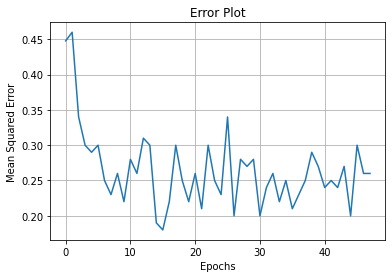

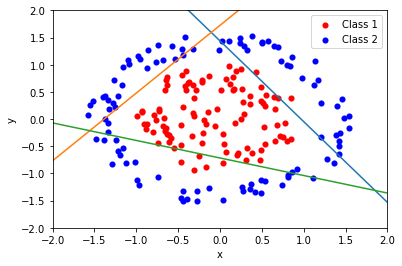

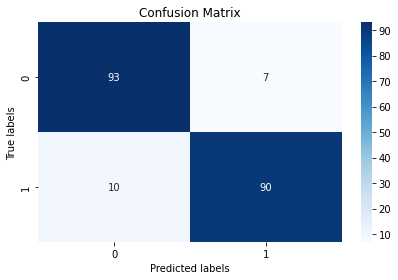

              precision    recall  f1-score   support

        -1.0       0.90      0.93      0.92       100
         1.0       0.93      0.90      0.91       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



In [ ]:
weights, biases, error_list = MRI(df0, df1, inputs,target,num_neurons_layer1 = 3 ,num_neurons_layer2 = 2,max_iter = 200,learning_rate = 0.0001,samples = inputs.shape[0])

sample: 200
Epoch 1 / 200
loss: 0.5373134328358209
W1: [ 0.01999928 -0.01868992]
b1: [-0.02033481]
W2: [0.0090555  0.03025936]
b2: [-0.01009131]
W3: [-0.03285424 -0.00251668]
b3: [-0.02987213]
Epoch 2 / 200
loss: 0.53
W1: [ 0.03196411 -0.01718711]
b1: [-0.03077899]
W2: [-0.00500262  0.0483135 ]
b2: [-0.02046311]
W3: [-0.01817077 -0.03760123]
b3: [-0.03979307]
Epoch 3 / 200
loss: 0.35
W1: [ 0.03951594 -0.01703764]
b1: [-0.04070401]
W2: [-0.02462661  0.04625301]
b2: [-0.03062091]
W3: [-0.02640123 -0.0513103 ]
b3: [-0.03014534]
Epoch 4 / 200
loss: 0.35
W1: [0.05345152 0.01232587]
b1: [-0.03084243]
W2: [-0.02450477  0.05230597]
b2: [-0.04075056]
W3: [-0.01851008 -0.05566127]
b3: [-0.03996725]
An early stop occurred!


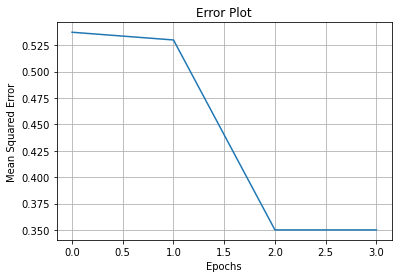

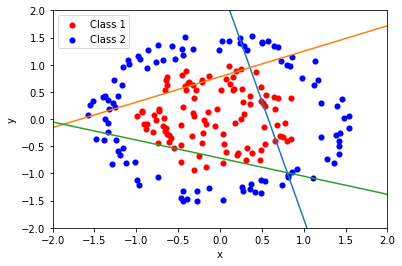

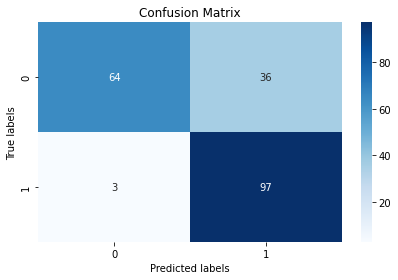

              precision    recall  f1-score   support

        -1.0       0.96      0.64      0.77       100
         1.0       0.73      0.97      0.83       100

    accuracy                           0.81       200
   macro avg       0.84      0.80      0.80       200
weighted avg       0.84      0.81      0.80       200



In [ ]:
weights, biases, error_list = MRI(df0, df1, inputs,target,num_neurons_layer1 = 3 ,num_neurons_layer2 = 2,max_iter = 200,learning_rate = 0.01,samples = inputs.shape[0])

### Madaline Results (4 neurons)

sample: 200
Epoch 1 / 200
loss: 0.3781094527363184
W1: [-0.00012744 -0.00039955]
b1: [-0.0002999]
W2: [0.00034974 0.00049579]
b2: [-0.00060016]
W3: [ 3.74797206e-04 -6.59544221e-05]
b3: [-0.00030007]
W4: [-0.00045818  0.00025898]
b4: [-0.00050013]
Epoch 2 / 200
loss: 0.18
W1: [-0.00013174 -0.0004157 ]
b1: [-0.00039991]
W2: [0.00034974 0.00049579]
b2: [-0.00060016]
W3: [ 0.00035165 -0.00012933]
b3: [-0.00040008]
W4: [-0.00058566  0.00018459]
b4: [-0.00050014]
Epoch 3 / 200
loss: 0.17
W1: [-0.00023854 -0.00048009]
b1: [-0.0003999]
W2: [0.00038604 0.00048675]
b2: [-0.00060017]
W3: [ 0.00031594 -0.0002285 ]
b3: [-0.00040009]
W4: [-0.0004656   0.00036107]
b4: [-0.00060016]
Epoch 4 / 200
loss: 0.07
W1: [-0.00029079 -0.00036586]
b1: [-0.00049991]
W2: [0.00038604 0.00048675]
b2: [-0.00060017]
W3: [ 0.00032348 -0.00029435]
b3: [-0.00040009]
W4: [-0.00049929  0.00034837]
b4: [-0.00060017]
Epoch 5 / 200
loss: 0.02
W1: [-0.00029079 -0.00036586]
b1: [-0.00049991]
W2: [0.00038604 0.00048675]
b2: [-0

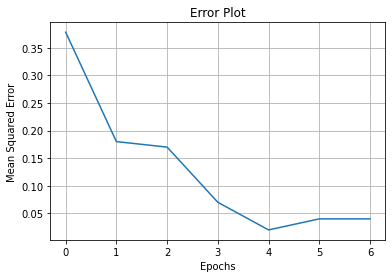

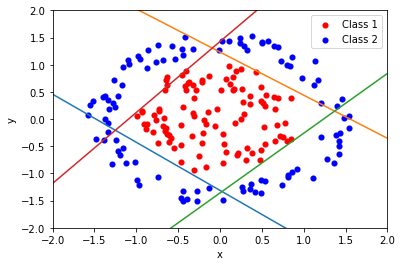

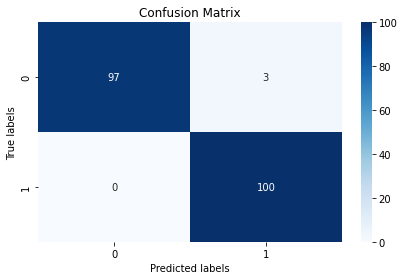

              precision    recall  f1-score   support

        -1.0       1.00      0.97      0.98       100
         1.0       0.97      1.00      0.99       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [ ]:
weights, biases, error_list = MRI(df0, df1, inputs,target,num_neurons_layer1 = 4 ,num_neurons_layer2 = 2,max_iter = 200,learning_rate = 0.0001,samples = inputs.shape[0])

sample: 200
Epoch 1 / 200
loss: 0.4975124378109453
W1: [-0.00118432 -0.00106362]
b1: [-0.00100089]
W2: [0.00031242 0.00077556]
b2: [-0.00100031]
W3: [ 0.00129383 -0.00142994]
b3: [-0.00100103]
W4: [-0.00129865  0.00117701]
b4: [-0.00100105]
Epoch 2 / 200
loss: 0.23
W1: [-0.00140555 -0.00075758]
b1: [-0.00200074]
W2: [0.0010105  0.00127987]
b2: [-0.00099997]
W3: [ 0.00108752 -0.00132146]
b3: [-0.00150173]
W4: [-0.00141668  0.0016316 ]
b4: [-0.00100115]
Epoch 3 / 200
loss: 0.27
W1: [-0.00139882 -0.00172706]
b1: [-0.00200096]
W2: [0.00115085 0.00159799]
b2: [-0.00150046]
W3: [ 0.00143307 -0.00158861]
b3: [-0.00150165]
W4: [-0.00136983  0.00128044]
b4: [-0.00200206]
Epoch 4 / 200
loss: 0.15
W1: [-0.00135278 -0.00152585]
b1: [-0.00250093]
W2: [0.00136777 0.00125143]
b2: [-0.00200087]
W3: [ 0.00136332 -0.00137619]
b3: [-0.00200181]
W4: [-0.00135979  0.00151128]
b4: [-0.00200218]
Epoch 5 / 200
loss: 0.12
W1: [-0.00168038 -0.00159274]
b1: [-0.00250088]
W2: [0.00103465 0.00168218]
b2: [-0.00200

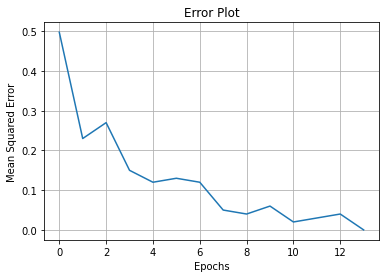

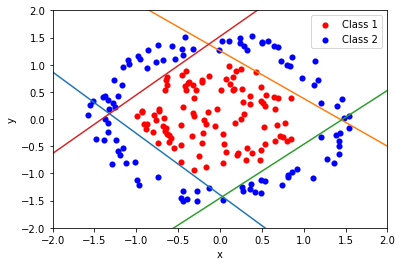

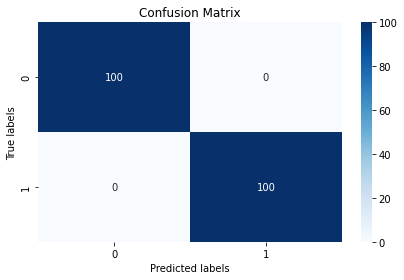

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
weights, biases, error_list = MRI(df0, df1, inputs,target,num_neurons_layer1 = 4 ,num_neurons_layer2 = 2,max_iter = 200,learning_rate = 0.0005,samples = inputs.shape[0])

### Madaline Results (10 neurons)

sample: 200
Epoch 1 / 200
loss: 0.5074626865671642
W1: [-0.00449166  0.00139753]
b1: [-0.01000403]
W2: [-0.00815933  0.01006695]
b2: [-0.01998125]
W3: [0.00131494 0.02063177]
b3: [-0.02015728]
W4: [ 0.02474997 -0.00124232]
b4: [-0.03051395]
W5: [-0.02141443 -0.00056342]
b5: [-0.02004181]
W6: [-0.00270789  0.00673301]
b6: [-0.02004848]
W7: [ 0.0096258 -0.0353953]
b7: [-0.02031051]
W8: [-0.00445004  0.00198922]
b8: [-0.01000343]
W9: [-0.00454089  0.00166856]
b9: [-0.0100034]
W10: [-0.00434511  0.00209132]
b10: [-0.01000384]
Epoch 2 / 200
loss: 0.22
W1: [-0.00449166  0.00139753]
b1: [-0.01000403]
W2: [-0.00815933  0.01006695]
b2: [-0.01998125]
W3: [0.00447757 0.02505918]
b3: [-0.02040738]
W4: [0.03302932 0.00115858]
b4: [-0.03063383]
W5: [-0.01454661 -0.00432588]
b5: [-0.03035814]
W6: [-0.00270789  0.00673301]
b6: [-0.02004848]
W7: [ 0.01216591 -0.02855176]
b7: [-0.03032487]
W8: [-0.00649812 -0.00355493]
b8: [-0.02011386]
W9: [-0.00908851 -0.00319185]
b9: [-0.02021021]
W10: [-0.00434511  

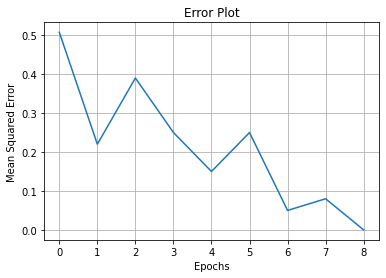

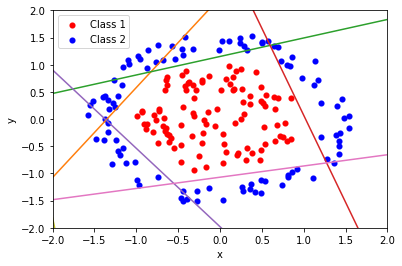

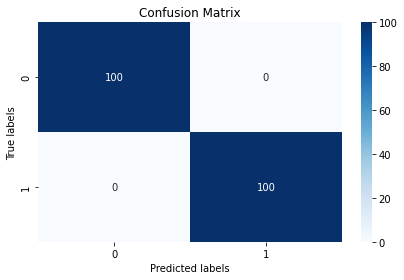

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
weights, biases, error_list = MRI(df0, df1, inputs,target,num_neurons_layer1 = 10 ,num_neurons_layer2 = 2,max_iter = 200,learning_rate = 0.01,samples = inputs.shape[0])

sample: 200
Epoch 1 / 200
loss: 0.4975124378109453
W1: [ 0.00039507 -0.00025718]
b1: [-0.00050009]
W2: [0.00034974 0.00049579]
b2: [-0.00060016]
W3: [2.49371696e-04 7.42828079e-05]
b3: [-0.00040007]
W4: [0.0001475  0.00046002]
b4: [-0.00050011]
W5: [-0.00013064 -0.00041798]
b5: [-0.00019998]
W6: [0.00038478 0.00064533]
b6: [-0.00070022]
W7: [-0.0002618   0.00038029]
b7: [-0.00030006]
W8: [0.0005287  0.00035952]
b8: [-0.00060018]
W9: [0.00040676 0.00012274]
b9: [-0.00050013]
W10: [0.00054922 0.00042307]
b10: [-0.00070025]
Epoch 2 / 200
loss: 0.11
W1: [ 0.00035963 -0.00033373]
b1: [-0.0005001]
W2: [0.00034974 0.00049579]
b2: [-0.00060016]
W3: [2.49371696e-04 7.42828079e-05]
b3: [-0.00040007]
W4: [0.0001475  0.00046002]
b4: [-0.00050011]
W5: [-0.00035888 -0.00021633]
b5: [-0.00030002]
W6: [0.00034179 0.00055785]
b6: [-0.00080022]
W7: [-0.00021964  0.00031996]
b7: [-0.00040006]
W8: [0.0005287  0.00035952]
b8: [-0.00060018]
W9: [0.00040676 0.00012274]
b9: [-0.00050013]
W10: [0.00054922 0.00

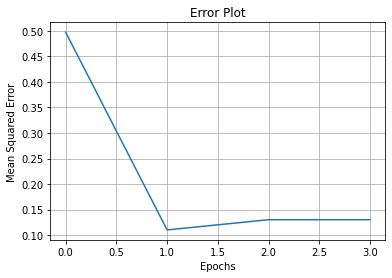

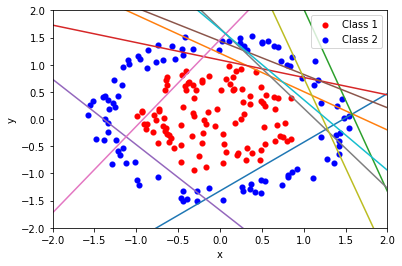

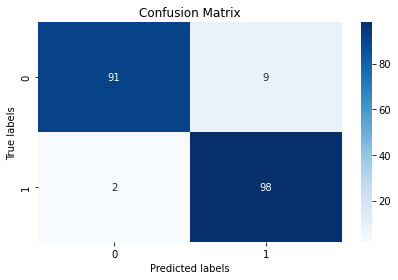

              precision    recall  f1-score   support

        -1.0       0.98      0.91      0.94       100
         1.0       0.92      0.98      0.95       100

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.94       200



In [ ]:
weights, biases, error_list = MRI(df0, df1, inputs,target,num_neurons_layer1 = 10 ,num_neurons_layer2 = 2,max_iter = 200,learning_rate = 0.0001,samples = inputs.shape[0])